In [12]:
import random
from PIL import Image, ImageDraw
import math
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import io
from sklearn import preprocessing
from skimage.exposure import histogram

im1 = cv2.imread("test5_0.jpg",0)
im2 = cv2.imread("test5_1.jpg",0)
im3 = cv2.imread("test5_2.jpg",0)
im4 = cv2.imread("test5_3.jpg",0)
im5 = cv2.imread("test5_4.jpg",0)
im6 = cv2.imread("test5_5.jpg",0)

In [13]:


def contourArea(im):
  ret, thresh = cv2.threshold(im,127,255,0)
  contours, hierarchy = cv2.findContours(thresh, 1,2)
  cnt = contours[0]
  return cv2.contourArea(cnt)

def drawImage(image, title, h):
    axes[h].set_title(title)
    axes[h].imshow(image, cmap='gray')

error: OpenCV(4.5.5) :-1: error: (-5:Bad argument) in function 'contourArea'
> Overload resolution failed:
>  - contour is not a numerical tuple
>  - Expected Ptr<cv::UMat> for argument 'contour'


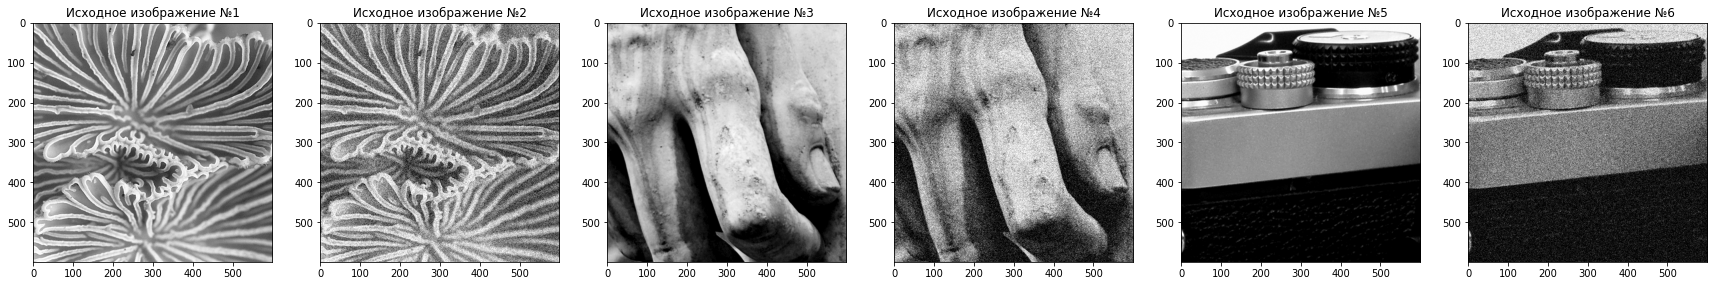

In [15]:
fig, axes = plt.subplots(1,6)
fig.set_figwidth(30)
fig.set_figheight(20)



drawImage(im1, 'Исходное изображение №1',0)
drawImage(im2, 'Исходное изображение №2',1)
drawImage(im3, 'Исходное изображение №3',2)
drawImage(im4, 'Исходное изображение №4',3)
drawImage(im5, 'Исходное изображение №5',4)
drawImage(im6, 'Исходное изображение №6',5)


arr=[]
for i in [im1, im2, im3, im4, im5, im6]:
    x = contourArea(i)
    arr.append( x)
print(arr)

In [16]:
def roberts(im):
  kernelx = np.array([[-1, 0], [0, 1]], dtype=int)
  kernely = np.array([[0, -1], [1, 0]], dtype=int)
  x = cv2.filter2D(im, cv2.CV_16S, kernelx)
  y = cv2.filter2D(im, cv2.CV_16S, kernely)
  absX = cv2.convertScaleAbs(x)
  absY = cv2.convertScaleAbs(y)
  return  cv2.addWeighted(absX, 0.5, absY, 0.5, 0)


def prewitt(im):
  kernelx = np.array([[-1,-1,-1],[0,0,0],[1,1,1]], dtype=int)
  kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]], dtype=int)
  x = cv2.filter2D(im, cv2.CV_16S, kernelx)
  y = cv2.filter2D(im, cv2.CV_16S, kernely)
  absX = cv2.convertScaleAbs(x)
  absY = cv2.convertScaleAbs(y)
  return cv2.addWeighted(absX,0.5,absY,0.5,0)

def sobel(im):
  kernelx = np.array([[-1,-2,-1],[0,0,0],[1,2,1]], dtype=int)
  kernely = np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype=int)
  x = cv2.filter2D(im, cv2.CV_16S, kernelx)
  y = cv2.filter2D(im, cv2.CV_16S, kernely)
  absX = cv2.convertScaleAbs(x)
  absY = cv2.convertScaleAbs(y)
  return cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

def laplacian(im):
  dst = cv2.Laplacian(im, cv2.CV_16S, ksize = 3)
  return cv2.convertScaleAbs(dst)

error: OpenCV(4.5.5) :-1: error: (-5:Bad argument) in function 'contourArea'
> Overload resolution failed:
>  - contour is not a numerical tuple
>  - Expected Ptr<cv::UMat> for argument 'contour'


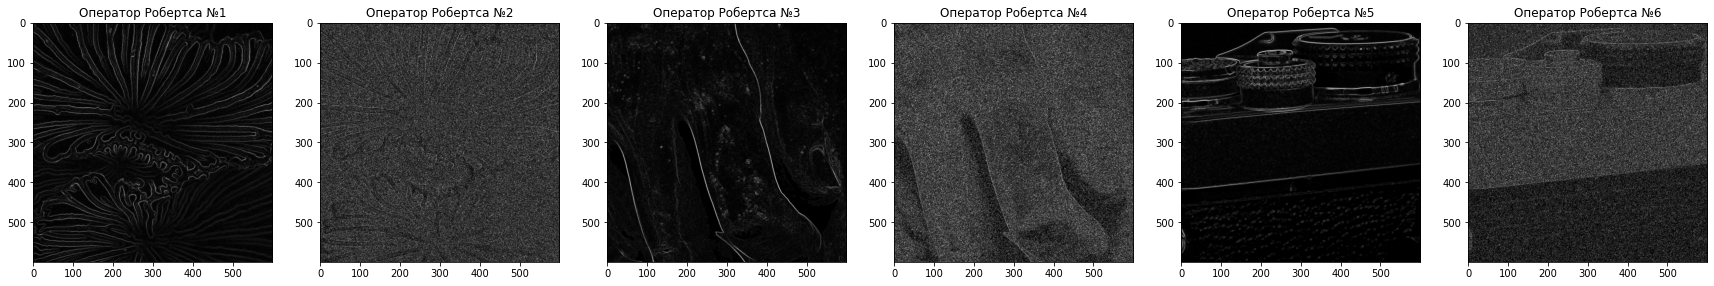

In [17]:
im1R = roberts(im1)
im2R = roberts(im2)
im3R = roberts(im3)
im4R = roberts(im4)
im5R = roberts(im5)
im6R = roberts(im6)

fig, axes = plt.subplots(1,6)
fig.set_figwidth(30)
fig.set_figheight(20)

drawImage(im1R, 'Оператор Робертса №1',0)
drawImage(im2R, 'Оператор Робертса №2',1)
drawImage(im3R, 'Оператор Робертса №3',2)
drawImage(im4R, 'Оператор Робертса №4',3)
drawImage(im5R, 'Оператор Робертса №5',4)
drawImage(im6R, 'Оператор Робертса №6',5)


arr=[]
for i in [im1R, im2R, im3R, im4R, im5R, im6R]:
    x = contourArea(i)
    arr.append( x)
print(arr)

error: OpenCV(4.5.5) :-1: error: (-5:Bad argument) in function 'contourArea'
> Overload resolution failed:
>  - contour is not a numerical tuple
>  - Expected Ptr<cv::UMat> for argument 'contour'


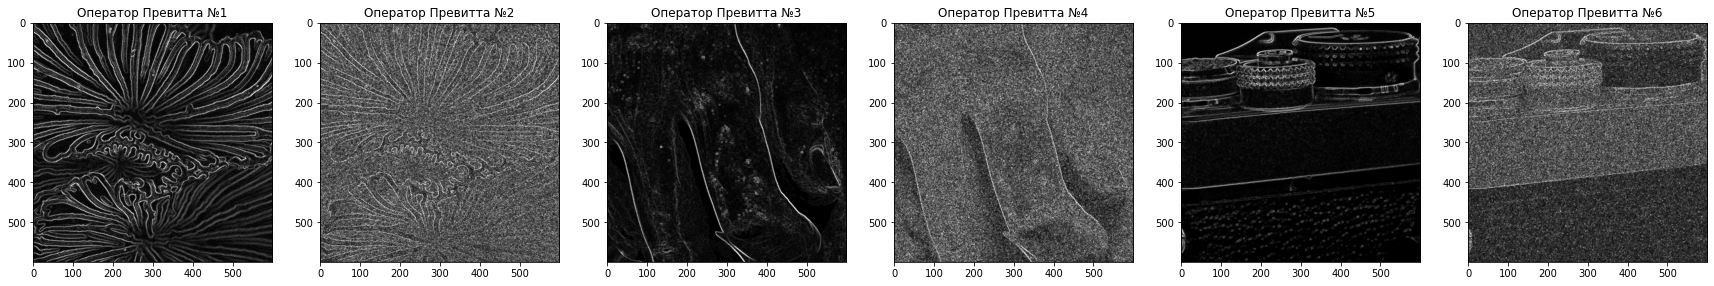

In [18]:
im1P = prewitt(im1)
im2P = prewitt(im2)
im3P = prewitt(im3)
im4P = prewitt(im4)
im5P = prewitt(im5)
im6P = prewitt(im6)

fig, axes = plt.subplots(1,6)
fig.set_figwidth(30)
fig.set_figheight(20)

drawImage(im1P, 'Оператор Превитта №1',0)
drawImage(im2P, 'Оператор Превитта №2',1)
drawImage(im3P, 'Оператор Превитта №3',2)
drawImage(im4P, 'Оператор Превитта №4',3)
drawImage(im5P, 'Оператор Превитта №5',4)
drawImage(im6P, 'Оператор Превитта №6',5)

arr=[]
for i in [im1P, im2P, im3P, im4P, im5P, im6P]:
    x = contourArea(i)
    arr.append( x)
print(arr)

error: OpenCV(4.5.5) :-1: error: (-5:Bad argument) in function 'contourArea'
> Overload resolution failed:
>  - contour is not a numerical tuple
>  - Expected Ptr<cv::UMat> for argument 'contour'


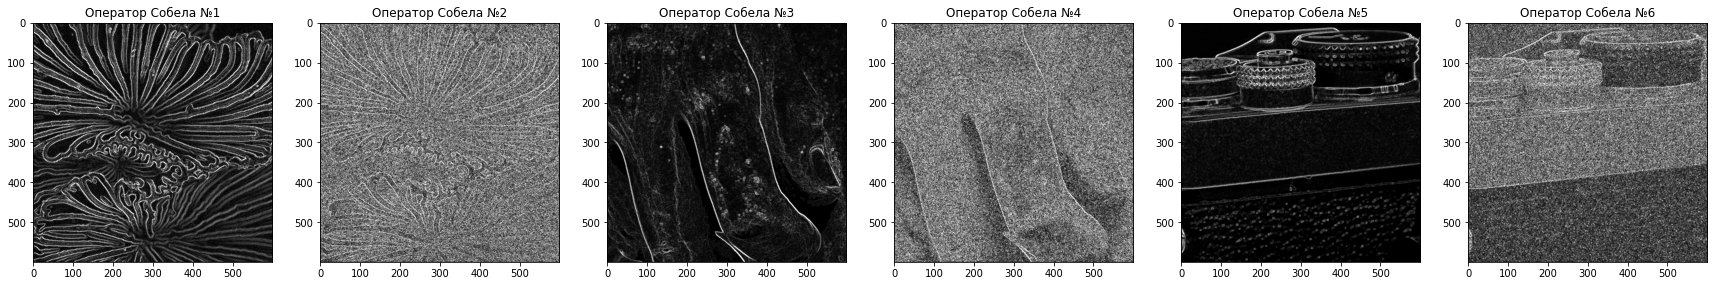

In [19]:
im1S = sobel(im1)
im2S = sobel(im2)
im3S = sobel(im3)
im4S = sobel(im4)
im5S = sobel(im5)
im6S = sobel(im6)

fig, axes = plt.subplots(1,6)
fig.set_figwidth(30)
fig.set_figheight(20)

drawImage(im1S, 'Оператор Собела №1',0)
drawImage(im2S, 'Оператор Собела №2',1)
drawImage(im3S, 'Оператор Собела №3',2)
drawImage(im4S, 'Оператор Собела №4',3)
drawImage(im5S, 'Оператор Собела №5',4)
drawImage(im6S, 'Оператор Собела №6',5)

arr=[]
for i in [im1S, im2S, im3S, im4S, im5S, im6S]:
    x = contourArea(i)
    arr.append( x)
print(arr)

In [ ]:
im1L = laplacian(im1)
im2L = laplacian(im2)
im3L = laplacian(im3)
im4L = laplacian(im4)
im5L = laplacian(im5)
im6L = laplacian(im6)

fig, axes = plt.subplots(1,6)
fig.set_figwidth(30)
fig.set_figheight(20)

drawImage(im1L, 'Оператор Лапласина №1',0)
drawImage(im2L, 'Оператор Лапласина №2',1)
drawImage(im3L, 'Оператор Лапласина №3',2)
drawImage(im4L, 'Оператор Лапласина №4',3)
drawImage(im5L, 'Оператор Лапласина №5',4)
drawImage(im6L, 'Оператор Лапласина №6',5)

arr=[]
for i in [im1L, im2L, im3L, im4L, im5L, im6L]:
    x = contourArea(i)
    arr.append( x)
print(arr)